In [1]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [19]:
import keras
import os
import numpy as np
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, Callback

In [3]:
target_height = 32
target_width  = 32
target_channel = 3

In [4]:
data_version_number = '0_1'

In [5]:
TRAIN_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train_' + data_version_number + '/'
VALIDATION_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/validation_' + data_version_number + '/'
TEST_PATH  = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/test_' + data_version_number + '/'

In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(target_height, target_width, target_channel)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [43]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

history = keras.callbacks.History()

In [44]:
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, 
                                                    target_size = (target_height, target_width)
#                                                     color_mode = 'grayscale'
                                                   )

validation_generator = test_datagen.flow_from_directory(VALIDATION_PATH, 
                                                    target_size = (target_height, target_width)
#                                                     color_mode = 'grayscale'
                                                   )

Found 342 images belonging to 10 classes.
Found 114 images belonging to 10 classes.


In [45]:
history = model.fit_generator(train_generator, 
                              validation_data = validation_generator,
                              epochs = 30,
                              verbose = 2,
                              callbacks=[ModelCheckpoint("C:/Users/KaiPin Liao/Documents/kaggle_whales/weights.hdf5", 
                                                          monitor='val_loss',
                                                          save_best_only=True, mode='auto', period=1, verbose=1), history]
                             )

Epoch 1/30
11/11 [==============================] - ETA: 6s - loss: 6.8543 - acc: 0.0000e+0 - ETA: 3s - loss: 7.3844 - acc: 0.0469    - ETA: 2s - loss: 7.3734 - acc: 0.052 - ETA: 2s - loss: 7.0947 - acc: 0.054 - ETA: 1s - loss: 7.2249 - acc: 0.050 - ETA: 1s - loss: 6.8724 - acc: 0.057 - ETA: 1s - loss: 6.6755 - acc: 0.055 - ETA: 0s - loss: 6.5181 - acc: 0.060 - ETA: 0s - loss: 6.4644 - acc: 0.064 - ETA: 0s - loss: 6.3828 - acc: 0.067 - 4s 379ms/step - loss: 6.3850 - acc: 0.0695 - val_loss: 3.9122 - val_acc: 0.1228

Epoch 00001: val_loss improved from inf to 3.91219, saving model to C:/Users/KaiPin Liao/Documents/kaggle_whales/weights.hdf5
Epoch 2/30
11/11 [==============================] - ETA: 0s - loss: 6.2463 - acc: 0.125 - ETA: 0s - loss: 5.3014 - acc: 0.125 - ETA: 0s - loss: 5.3728 - acc: 0.135 - ETA: 0s - loss: 5.0733 - acc: 0.135 - ETA: 0s - loss: 5.0587 - acc: 0.121 - ETA: 0s - loss: 5.1221 - acc: 0.121 - ETA: 0s - loss: 5.1629 - acc: 0.117 - ETA: 0s - loss: 5.1408 - acc: 0.110

11/11 [==============================] - ETA: 0s - loss: 1.9468 - acc: 0.250 - ETA: 0s - loss: 2.0371 - acc: 0.234 - ETA: 0s - loss: 2.0764 - acc: 0.213 - ETA: 0s - loss: 2.0397 - acc: 0.202 - ETA: 0s - loss: 2.0183 - acc: 0.231 - ETA: 0s - loss: 1.9922 - acc: 0.247 - ETA: 0s - loss: 2.0216 - acc: 0.243 - ETA: 0s - loss: 2.0023 - acc: 0.233 - ETA: 0s - loss: 2.0204 - acc: 0.232 - 3s 299ms/step - loss: 2.0146 - acc: 0.2314 - val_loss: 2.0222 - val_acc: 0.1842

Epoch 00014: val_loss improved from 2.02811 to 2.02224, saving model to C:/Users/KaiPin Liao/Documents/kaggle_whales/weights.hdf5
Epoch 15/30
11/11 [==============================] - ETA: 0s - loss: 1.9506 - acc: 0.187 - ETA: 0s - loss: 1.8944 - acc: 0.250 - ETA: 0s - loss: 1.8804 - acc: 0.239 - ETA: 0s - loss: 1.9411 - acc: 0.218 - ETA: 0s - loss: 1.9361 - acc: 0.218 - ETA: 0s - loss: 1.9185 - acc: 0.239 - ETA: 0s - loss: 1.9245 - acc: 0.227 - ETA: 0s - loss: 1.9338 - acc: 0.261 - ETA: 0s - loss: 1.9307 - acc: 0.277 - ETA: 0s - l


Epoch 00027: val_loss did not improve from 1.81469
Epoch 28/30
11/11 [==============================] - ETA: 0s - loss: 1.4545 - acc: 0.409 - ETA: 0s - loss: 1.3448 - acc: 0.532 - ETA: 0s - loss: 1.3780 - acc: 0.542 - ETA: 0s - loss: 1.3706 - acc: 0.586 - ETA: 0s - loss: 1.3509 - acc: 0.588 - ETA: 0s - loss: 1.3378 - acc: 0.589 - ETA: 0s - loss: 1.3107 - acc: 0.562 - ETA: 0s - loss: 1.3122 - acc: 0.547 - ETA: 0s - loss: 1.2999 - acc: 0.552 - ETA: 0s - loss: 1.3264 - acc: 0.556 - 3s 309ms/step - loss: 1.3508 - acc: 0.5546 - val_loss: 1.9170 - val_acc: 0.4386

Epoch 00028: val_loss did not improve from 1.81469
Epoch 29/30
11/11 [==============================] - ETA: 0s - loss: 1.1446 - acc: 0.656 - ETA: 0s - loss: 1.1690 - acc: 0.640 - ETA: 0s - loss: 1.2635 - acc: 0.639 - ETA: 0s - loss: 1.3209 - acc: 0.604 - ETA: 0s - loss: 1.3165 - acc: 0.577 - ETA: 0s - loss: 1.2520 - acc: 0.606 - ETA: 0s - loss: 1.2554 - acc: 0.599 - ETA: 0s - loss: 1.2472 - acc: 0.595 - ETA: 0s - loss: 1.2162 - a

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


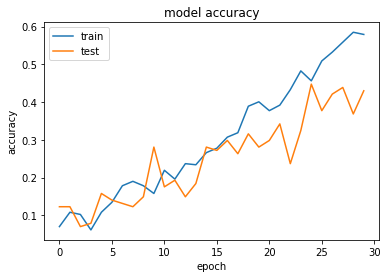

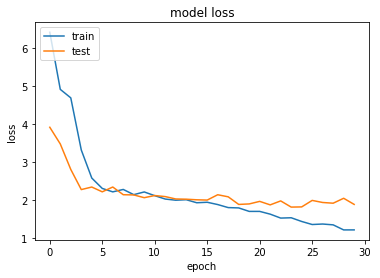

In [46]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend(['train'], loc='upper left')
plt.show()

In [47]:
history.history['val_loss'][-1]

1.8855085414752626

In [49]:
model.load_weights("C:/Users/KaiPin Liao/Documents/kaggle_whales/weights.hdf5")

In [50]:
model_val_loss, model_acc = model.evaluate_generator(generator = validation_generator)
model_val_loss, model_acc

(1.8146933840032209, 0.32456140507731523)

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          18496     
__________

In [53]:
import sys
print(sys.version)

3.6.2 |Anaconda custom (64-bit)| (default, Jul 20 2017, 12:30:02) [MSC v.1900 64 bit (AMD64)]


In [54]:
import tensorflow as tf
tf.VERSION

'1.8.0'

In [59]:
!pip install --ignore-installed --upgrade "C:/Users/KaiPin Liao/Documents/kaggle_whales/tensorflow-1.8.0-cp36-cp36m-win_amd64.whl"

Processing c:\users\kaipin liao\documents\kaggle_whales\tensorflow-1.8.0-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/59/a6/0ae6092b7542cfedba6b2a1c9b8dceaf278238c39484f3ba03b03f07803c/tensorboard-1.8.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/35/6b/11530768cac581a12952a2aad00e1526b89d242d0b9f59534ef6e6a1752f/astor-0.7.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/20/c4/12e3e56473e52375aa29c4764e70d1b8f3efa6682bef8d0aae04fe335243/Werkzeug-0.14.1-py2.py3-none-any.whl
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\KaiPin Liao\AppData\Local\pip\Cache\wheels\18\ea\5e\e36e1b8739e78cd2eba0a08fdc602c2b16a4b263912af8cb64
  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\KaiPin Liao\AppData\Lo

Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\anaconda3\\Lib\\site-packages\\numpy\\core\\multiarray.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [60]:
os.environ["PATH"]

'C:\\Anaconda3\\Library\\bin;C:\\Anaconda3\\Library\\bin;C:\\Anaconda3\\Scripts;C:\\Anaconda3\\Library\\bin;C:\\Anaconda3;C:\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Anaconda3\\Library\\usr\\bin;C:\\Anaconda3\\Library\\bin;C:\\Anaconda3\\Scripts;C:\\Anaconda3\\bin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\iCLS Client\\;C:\\Program Files (x86)\\RSA SecurID Token Common;C:\\Program Files\\RSA SecurID Token Common;C:\\ProgramData\\Oracle\\Java\\javapath;C:\\Program Files\\Intel\\iCLS Client\\;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;c:\\Program Files (x86)\\Box\\Box Edit\\;C:\\Program Files (x86)\\IBM\\Notes;C:\\Program Files\\Intel\\WiFi\\bin\\;C:\\Program Files\\Common Files\\Intel\\WirelessCommon\\;C:\\Program Files\\dotnet\\;C:\\Program Files\\PuTTY\\;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Manage